# **The objectives of the lab**

The purpose of this lab is to implement and compare different software solution to the Lasso.


## 1. Define the problem

1.1 Générez les données du problème. Une matrice $X$ de taille $n=200$ individus et $p=2n$ variables. Vous prendrez soin de centrer la matrice et de la normaliser de sorte que $\sum_{i=1}^n X_{ij}^2 = 1$. Un vecteur de paramètre $w_{opt} \in R^{p}$  dont $k=5$ seulement sont non nulles. Un vecteur de réponses $y = X w_{opt} + \varepsilon \in R^n$ où $\varepsilon$ est un bruit Gaussien entrainant un rapport signal sur bruit de 2.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cvxpy as cvx
import time

n = 200              # number of examples (you can try with n = 1000 and n = 5000 (it may take some time...))
p = 2*n              # dimensionality of the problem

k = 5                # number of active variables
# creating features and normalizing them (normalization is not necessary)
np.random.seed(0)
X = np.random.randn(n,p)
X = (X - np.mean(X,axis = 0))/np.std(X,axis = 0)

t = np.arange(0,p)/(p-1);   # bulding the variance matrix !
S = np.zeros((p,p))
nn = 0.00001
for i in range(p):
    S[i,:] = np.exp(-(t-t[i])**2/nn);

X = X@(S**.5)
#X = X/np.std(X,axis = 0)
X = X/np.linalg.norm(X,axis=0)
X = np.array(X, order='F')

# generating optimal weights
ind = np.random.choice(p, k, replace=False)
weights = np.random.randn(k)
weights += 0.1+np.sign(weights)  # to get large enough weight

wopt = np.zeros(p)
wopt[ind] = weights

# generating output by X@w + noise
rsnr = 2
z = X[:,ind]@weights
stdnoise = np.std(z)/rsnr
y = z + stdnoise*np.random.randn(n)

In [ ]:
cvx.installed_solvers()

['CVXOPT', 'ECOS', 'ECOS_BB', 'GLPK', 'GLPK_MI', 'OSQP', 'SCIPY', 'SCS']

1.2 Vérifiez que les données générées ont bien les propriétés attentudes.

In [ ]:
print(np.mean(X))
epsi = 1e-10
np.abs(np.mean(X)) < epsi
#...

8.604228440844963e-20
2.3387244454010023


-0.007828481395382846

1.3 Calculez l'erreur de généralisation "in sample" de la méthode des moindres carrés,

In [ ]:
#...
print("Test error for the LS regression: {:0.4f}".format(e_ls))

Test error for the LS regression: 2.7231


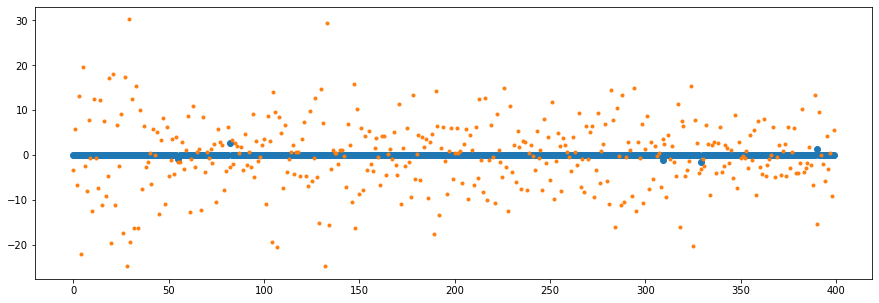

In [ ]:
plt.figure(figsize = (15,5))
plt.plot(wopt,'o')
plt.plot(b_ls,'.')
plt.show()

1.4 Ecrire une fonction Eval\_coef(X,z,coeff), qui calcule l'erreur de généralisation "in sample"  

In [ ]:
def Eval_coef(X,z,coeff):
  return #...

Eval_coef(X,z,b_ls)

2.7231183598715685

## 2.  Différentes manières de résoudre le problème du Lasso

2.1 Ecrire un programme CVX résolvant, pour $\lambda = 10^{-3} n$.
	$$
\displaystyle\min_{\beta \in R^p}  \; J_\lambda(\beta) \quad \mbox{avec} \quad J_\lambda(\beta) =  \displaystyle \tfrac{1}{2} \| X \beta - y\|^2  + \lambda   \displaystyle \sum_{j=1}^p |\beta_j|
$$

Aide en ligne pour CVXpy :    
https://www.cvxpy.org/     
https://www.cvxpy.org/examples/machine_learning/lasso_regression.html    
https://github.com/cvxgrp/cvxpy/blob/master/examples/lasso.py     
http://web.cvxr.com/cvx/beta/doc/CVX.pdf     


2.2 Vérifiez que la solution obtenue est bien optimale. Pour ce faire on vérifiera que $0 \in \partial J_\lambda(\beta)$, that is

if $g = X^\top (X\beta - y)$
$$
\begin{array}{c l}
g_j + \lambda sign(\beta_j) = 0 & \text{ if } \beta_j \neq 0\\
|g_j| < \lambda & \text{ if } \beta_j = 0
\end{array}
$$

2.3 Ecrire une programme CVX résolvant la formulation suivant de Lasso,  avec
une valeur de  $t$ permettant d'obtenir les mêmes résultats que le problème précédent.
	\begin{equation}
	\left\{
	\begin{array}{cc}
		\displaystyle\min_{\beta \in R^p}  & \displaystyle \tfrac{1}{2} \| X \beta - y\|^2 \\
		\mbox{ avec } & \displaystyle \sum_{j=1}^p |\beta_j| \leq t
	\end{array}
	\right.
\end{equation}


2.4 résoudre le problème du  Lasso de la question précédente (2.3) en réécrivant le cout comme une fonctionnelle quadratique de la forme
	$$
	\tfrac{1}{2} \beta^\top D \beta + \beta^\top e
	$$
	où la matrice $D$ et le vecteur $e$ sont à préciser


2.5 réécrire le Lasso comme un programme quadratique sous sa forme standard.
	\begin{equation}
	\left\{
	\begin{array}{cc}
	\displaystyle\min_{x \in R^n}  & \displaystyle \tfrac{1}{2} x^\top H x + x^\top c \\
	\mbox{ avec } &A x \leq b
	\end{array}
	\right.
	\end{equation}

où les matrice $H$ et $A$ et les vecteur $c$ et $b$ sont à préciser.

2.6  proposez un code CVX permettant de résoudre le Lasso réécrit comme un QP standard.


2.7 comment résoudre ce même QP de manière plus efficace ?

2.8 résoudre, à l'aide de CVX,  le problème dual du Lasso
	$$
	\left\{
	\begin{array}{cl}
		\displaystyle \min_{\beta} & \frac{1}{2} \|X  \beta \|^2 \\
		s.t.   & \|X^\top(X\beta-y)\|_\infty \leq \lambda
	\end{array}
	\right.
	$$

# TP2 sur le Lasso
## 1.  Coder l'algorithme component wise pour résoudre le  Lasso



In [ ]:
w = np.zeros(p)
print(lasso_cost(X,y,w,lamb))

8.985228110911246


## 2. Coder l'algorithme reweigthed least square pour résoudre le  Lasso

## 3.  Le  Lasso pour sklearn

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

## 4. comparez toutes les solutions en terme de temps de calcul et de performances. Proposez et justifiez des recommandations sur la méthode à utiliser pour résoudre un problème de lasso.
